# Quantum Transport: Atom to Transistor by Supriyo Datta 

***

# Table of Contents

2. <font size="3.5">[Schrodinger equation](#second-chapter)<br></font>
    2.3. [Examples](#2.3)<br>
    [_References_](#references)<br>

***

# 2. Schrodinger equation <a id="second-chapter"></a>

## <font color = "navy" >2.3 Examples </font> <a id="2.3"></a>

### <font color = "navy" >2.3.1 Particle in a box </font>

In [24]:
%reset -f
%matplotlib inline
from pylab import *

In [25]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; m=9.110e-31; epsil=8.854e-12; q=1.602e-19;

#Lattice
Np=100; a=1e-10; X=a*array(list(range(1,Np+1))); t0=(hbar**2)/(2*m*(a**2))/q; L=a*(Np+1);
T=(2*t0*diag(ones((Np)))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1)));
[D,V]=eigh(T); Enum=sort(D);

ind=array(list(range(0,100)));

E1=D[ind[0]]; psi1=abs(V[:,ind[0]]); P1=psi1*conj(psi1);
E2=D[ind[24]]; psi2=abs(V[:,ind[24]]); P2=psi2*conj(psi2);

#analytical eigenvalues
Ean=(((hbar*pi)**2)/(2*m*(L**2))/q)*array((list(range(1,Np+1))))*array((list(range(1,Np+1))));

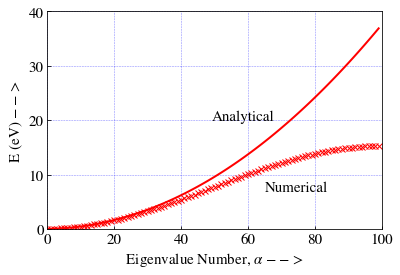

In [26]:
plot(Enum,'rx',lw=1) #Part(a)
plot(Ean,'r',lw=2) #Part(a)
xlabel(' Eigenvalue Number, ' r'$\alpha$' ' $-->$ ',fontsize=15) #Part(a)
ylabel(' E (eV) $-->$ ',fontsize=15) #Part(a)
xlim(0,100)
ylim(0,40)
tick_params(axis='both',which='major',labelsize=15,direction='in')
text(49,20,'Analytical',fontsize=15)
text(65,7,'Numerical',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 2.3.2__ (a) Numerical evaluation yields 100 eigenvalues that follow the analytical result well for low energies but deviate at higher energies because the wavefunctions oscillate too rapidly.</font>

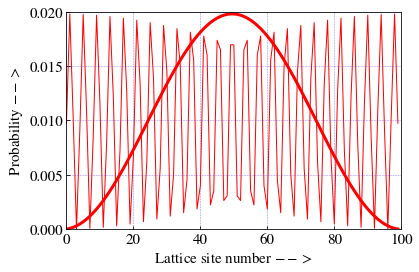

In [27]:
plot(P1,'r',lw=3) #Part(b)
plot(P2,'r',lw=1) #Part(b)
xlabel(' Lattice site number $-->$ ',fontsize=15) # Part(b)
ylabel(' Probability $-->$ ',fontsize=15) # Part(b)
xlim(0,100)
ylim(0,0.02)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 2.3.2__ (b) Probability distribution (squared eigenfunction) for eigenvalues $\alpha=1$ and $\alpha=25$. </font>

***

In [28]:
%reset -f
%matplotlib inline
from pylab import *

In [29]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; m=9.110e-31; epsil=8.854e-12; q=1.602e-19;

#Lattice
Np=100; a=1e-10; X=a*array(list(range(1,Np+1))); t0=(hbar**2)/(2*m*(a**2))/q; L=a*(Np+1);
T=(2*t0*diag(ones((Np)))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1)));
T[0,Np-1]=-t0; T[Np-1,0]=-t0;
[D,V]=eigh(T); Enum=sort(D); ind=array(list(range(0,100)));

E1=D[ind[0]]; psi1=abs(V[:,ind[0]]); P1=psi1*conj(psi1);
E2=D[ind[24]]; psi2=abs(V[:,ind[24]]); P2=psi2*conj(psi2);

#analytical eigenvalues
Ean=(((hbar*pi)**2)/(2*m*(L**2))/q)*array((list(range(1,Np+1))))*array((list(range(1,Np+1))));

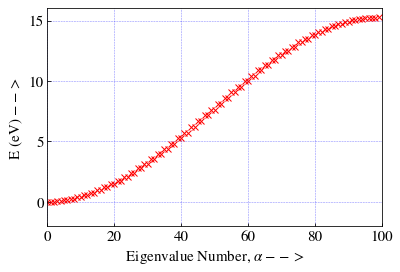

In [30]:
plot(Enum,'rx',lw=3)
xlabel(' Eigenvalue Number, 'r'$\alpha -->$ ',fontsize=15)
ylabel(' E (eV) $-->$ ',fontsize=15)
xlim(0,100)
ylim(-2,16)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 2.3.5__ Energy eigenvalues for a box of length 101 $\mathring{A}$ with periodic boundary conditions: the eigenvalues now come in pairs. </font>

***

### <font color = "navy" >2.3.2 Particle in a 3D “box” </font>

In [31]:
%reset -f
%matplotlib inline
from pylab import *

In [32]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; m=9.110e-31; epsil=8.854e-12; q=1.602e-19;
a0=4*pi*epsil*hbar*hbar/(m*q*q); E0=q/(8*pi*epsil*a0);

#Lattice
Np=100; a=(5e-10*1/Np);
R=a*array(list(range(1,Np+1))); t0=(hbar**2)/(2*m*(a**2))/q; 
l=0;

#Hamiltonian,H = Kinetic,K + Potential,U
K=(2*t0*diag(ones((Np)))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1)));
U=((-q/(4*pi*epsil)/R)+(l*(l+1)*hbar*hbar/(2*m*q))/(R*R)); U=diag(U);
[D,V]=eigh(K+U); DD=sort(D); ind=array(list(range(0,100)));

#analytical solutions
P1s=(4*a/(a0**3))*R*R*exp(-2*R/a0);
P2s=(4*a/(2*4*4*(a0**3)))*R*R*((2-(R/a0))**2)*exp(-2*R/(2*a0));
P3s=(4*a/(3*81*81*(a0**3)))*R*R*((27-(18*R/a0)+(2*(R/a0)**2))**2)*exp(-2*R/(3*a0));
P2p=(4*a/(3*32*(a0**3)))*R*R*((R/a0)**2)*exp(-2*R/(2*a0));
P3p=(8*a/(3*81*81*(a0**3)))*R*R*((6-(R/a0))**2)*((R/a0)**2)*exp(-2*R/(3*a0));

In [33]:
#Quantum numbers

#for 1s
n=1; l=0;
E=D[ind[n-l-1]]; psi=V[:,ind[n-l-1]]; P1=psi*conj(psi);

#for 2s
n=2; l=0;
E=D[ind[n-l-1]]; psi=V[:,ind[n-l-1]]; P2=psi*conj(psi); 

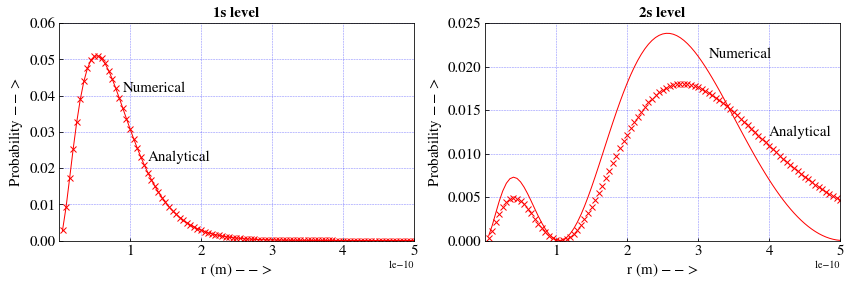

In [34]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(R,P1,'r',lw=1)
plot(R,P1s,'rx',lw=1) #P1s for '1s'
xlabel(' r (m) $-->$ ',fontsize=15)
ylabel(' Probability $-->$ ',fontsize=15)
xlim(0,5e-10)
ylim(0,0.06)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(1e-10,6e-10,1e-10),fontsize=15)
title('1s level',fontsize=15,fontweight='bold')
text(0.9e-10,0.041,'Numerical',fontsize=15)
text(1.25e-10,0.022,'Analytical',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(R,P2,'r',lw=1)
plot(R,P2s,'rx',lw=1) #P2s for '2s'
xlabel(' r (m) $-->$ ',fontsize=15)
ylabel(' Probability $-->$ ',fontsize=15)
xlim(0,5e-10)
ylim(0,0.025)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(1e-10,6e-10,1e-10),fontsize=15)
title('2s level',fontsize=15,fontweight='bold')
text(3.15e-10,0.021,'Numerical',fontsize=15)
text(4e-10,0.012,'Analytical',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 2.3.6__ Radial probability distribution $|f(r)|^2$ corresponding to the two lowest eigenvalues ($–13.56 eV$ and $−2.96 eV$) for $l = 0$ (which correspond to the 1s and 2s levels). The dots show the analytical result while the solid curve denotes the numerical result obtained using a lattice with 100 points spaced by $a = 0.05\mathring{A}$. </font>

________________________________

In [35]:
%reset -f
%matplotlib inline
from pylab import *

In [36]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; m=9.110e-31; epsil=8.854e-12; q=1.602e-19;
a0=4*pi*epsil*hbar*hbar/(m*q*q); E0=q/(8*pi*epsil*a0);

#Lattice
Np=100; a=(5e-10*2/Np);
R=a*array(list(range(1,Np+1))); t0=(hbar**2)/(2*m*(a**2))/q; 
l=0;

#Hamiltonian,H = Kinetic,K + Potential,U
K=(2*t0*diag(ones((Np)))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1)));
U=((-q/(4*pi*epsil)/R)+(l*(l+1)*hbar*hbar/(2*m*q))/(R*R)); U=diag(U);
[D,V]=eigh(K+U); DD=sort(D); ind=array(list(range(0,100)));

#analytical solutions
P1s=(4*a/(a0**3))*R*R*exp(-2*R/a0);
P2s=(4*a/(2*4*4*(a0**3)))*R*R*((2-(R/a0))**2)*exp(-2*R/(2*a0));
P3s=(4*a/(3*81*81*(a0**3)))*R*R*((27-(18*R/a0)+(2*(R/a0)**2))**2)*exp(-2*R/(3*a0));
P2p=(4*a/(3*32*(a0**3)))*R*R*((R/a0)**2)*exp(-2*R/(2*a0));
P3p=(8*a/(3*81*81*(a0**3)))*R*R*((6-(R/a0))**2)*((R/a0)**2)*exp(-2*R/(3*a0));

In [37]:
#Quantum numbers

#for 1s
n=1; l=0;
E=D[ind[n-l-1]]; psi=V[:,ind[n-l-1]]; P1=psi*conj(psi);

#for 2s
n=2; l=0;
E=D[ind[n-l-1]]; psi=V[:,ind[n-l-1]]; P2=psi*conj(psi); 

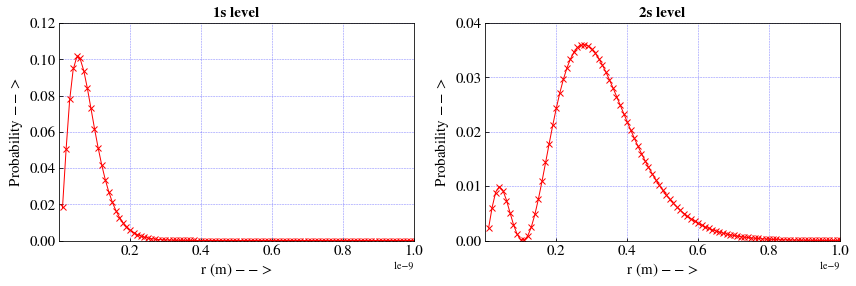

In [38]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(R,P1,'r',lw=1)
plot(R,P1s,'rx',lw=1) #P1s for '1s'
xlabel(' r (m) $-->$ ',fontsize=15)
ylabel(' Probability $-->$ ',fontsize=15)
xlim(0,1e-9)
ylim(0,0.12)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2e-9,1.2e-9,0.2e-9),fontsize=15)
title('1s level',fontsize=15,fontweight='bold')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(R,P2,'r',lw=1)
plot(R,P2s,'rx',lw=1) #Use P2s for '2s'
xlabel(' r (m) $-->$ ',fontsize=15)
ylabel(' Probability $-->$ ',fontsize=15)
xlim(0,1e-9)
ylim(0,0.04)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2e-9,1.2e-9,0.2e-9),fontsize=15)
title('2s level',fontsize=15,fontweight='bold')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 2.3.7__ Radial probability distribution $|f(r)|^2$ corresponding to the two lowest eigenvalues ($–13.47 eV$ and $−3.39 eV$) for $l = 0$ (which correspond to the 1s and 2s levels). Solid line shows the analytical result while the x’s denote the numerical result obtained using a lattice with 100 points spaced by $a = 0.1\mathring{A}$. </font>

***

## _References_ </u><a id="references"></a>

<font color = "stone"><font size = "3" > 
- Datta, S. (2005). Quantum Transport: Atom to Transistor. Cambridge: Cambridge University Press. doi:10.1017/CBO9781139164313 
- Datta, S. “Fundamentals of Nanoelectronics: Basic Concepts”. MOOC offered by the Purdue University. <br>
[Online] https://courses.edx.org/courses/PurdueX/nano520/3T2015/course/
- Datta, S. “Fundamentals of Nanoelectronics, Part B: Quantum Transport”. MOOC offered by the Purdue University. <br> 
[Online] https://courses.edx.org/courses/course-v1:PurdueX+nano521x+2015_T3/course/</font>